In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA - Spotify Tracks Dataset

In this notebook we are going to perform exploratory data anlysis (EDA) on Huggingface's spotify tracks dataset. The intent of this notebook is exclusively to get insights about the dataset. Model building will be performed in a different notebook.

- Dataset source: [https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?datasetId=11167&sortBy=voteCount ](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset)
- Download date: `25.08.2023`

## Global Settings

In [ ]:
RANDOM_SEED = 42

## Train Set Insights

In [1]:
from datasets import load_dataset

In [2]:
dataset = load_dataset('maharshipandya/spotify-tracks-dataset')
print(f"Shape: {dataset.shape}")

Shape: {'train': (114000, 21)}


In [5]:
df = pd.DataFrame(dataset.get('train'))
print(f"Shape: {df.shape}")
df.info()

Shape: (114000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  

In [13]:
INT_FEATURES = df.select_dtypes(include=['int64', 'int32']).columns.tolist()
print(f"There are {len(INT_FEATURES)} int features in the dataset")

FLOAT_FEATURES = df.select_dtypes(include=['float64', 'float32']).columns.tolist()
print(f"There are {len(FLOAT_FEATURES)} float features in the dataset")

There are 6 int features in the dataset
There are 9 float features in the dataset


## Feature Distributions

First, we will simply observe the distributions of each of the 20 features.

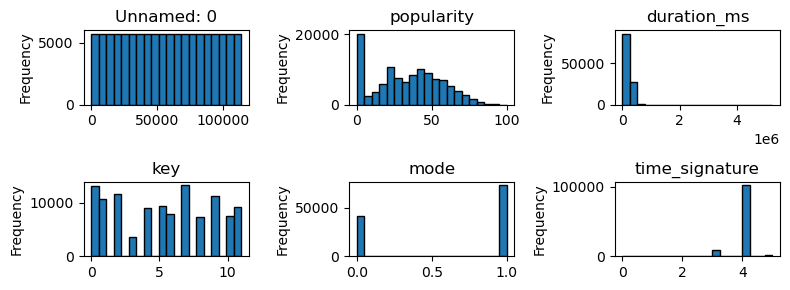

In [16]:
n_rows, n_cols = 2, 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 3))
axes = axes.flatten()

for i, (feature, ax) in enumerate(zip(INT_FEATURES, axes)):
    ax.hist(df[feature], bins=20, edgecolor='black')
    ax.set_title(f'{feature}')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

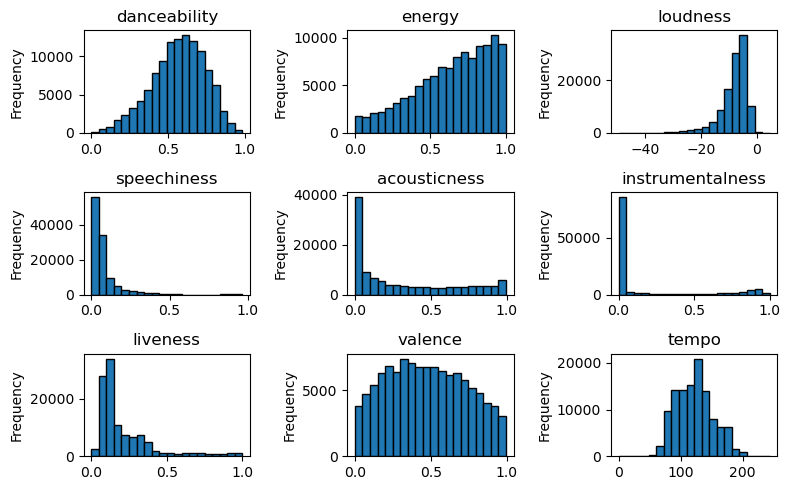

In [17]:
n_rows, n_cols = 3, 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 5))
axes = axes.flatten()

for i, (feature, ax) in enumerate(zip(FLOAT_FEATURES, axes)):
    ax.hist(df[feature], bins=20, edgecolor='black')
    ax.set_title(f'{feature}')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

- It seems like there are 6 binary features: `wifi`, `touch_screen`, `four_g`, `blue`, `dual_sim`, `three_g`
- The other features are either discrete or continuous

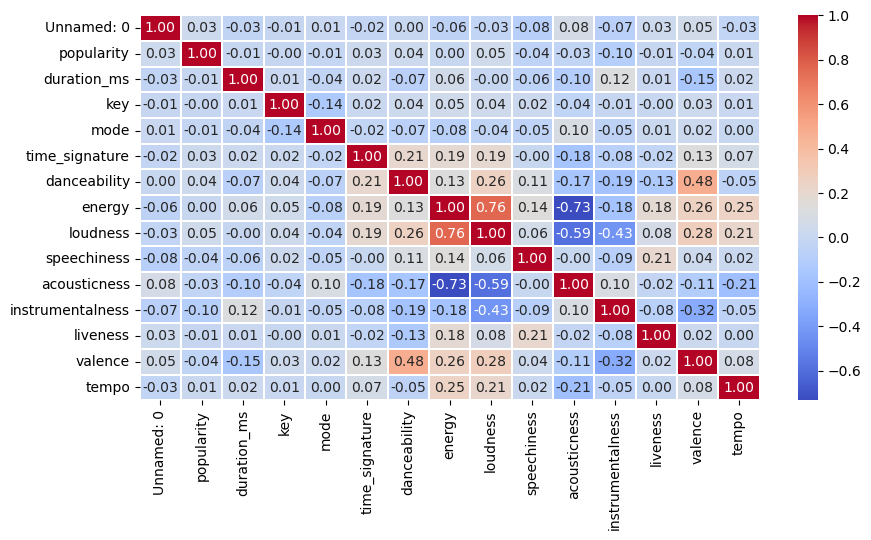

In [20]:
corr_mat = df[INT_FEATURES + FLOAT_FEATURES].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_mat, vmax=1, annot=True, linewidths=.2, fmt=".2f", cmap='coolwarm')
plt.xticks(rotation=90)
plt.show()

## Target Against Features

In [21]:
TARGET = 'popularity'

/var/folders/hr/210g1_rn5m79vp30n289drqh0000gq/T/ipykernel_43557/2772762389.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = df.corr()[TARGET].drop(TARGET)


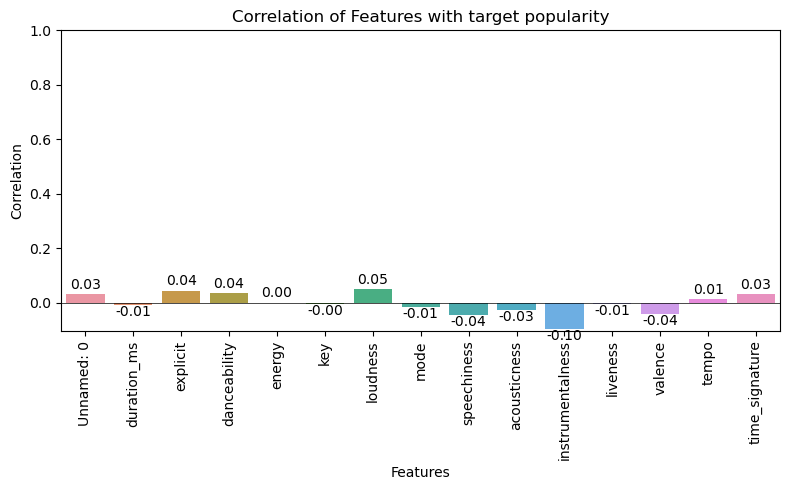

In [23]:
corrs = df.corr()[TARGET].drop(TARGET)

plt.figure(figsize=(8, 5))
sns.barplot(x=corrs.index, y=corrs.values)
plt.axhline(y=0, color='black', linewidth=0.5)
for i, corr in enumerate(corrs.values):
    plt.text(i, corr + 0.02 if corr >= 0 else corr - 0.04, f"{corr:.2f}", ha='center', fontsize=10, color='black')

plt.xticks(rotation=90)
plt.yticks(np.arange(0.0, 1.2, 0.2))
plt.xlabel("Features")
plt.ylabel(f"Correlation")
plt.title(f"Correlation of Features with target {TARGET}")
plt.tight_layout()
plt.show()